In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from plotting_utils import save_figure
import umap
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from tfidf_transformers import TfidfTransformer
from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction
from k_means_clusters import cluster_and_visualize, cluster_from_file
import pickle

In [2]:
# read in processed data_all
df = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/data/processed_data_all_vol_1.csv')

In [6]:
transformer = TfidfTransformer(max_features=None, min_df=0.005, max_df=0.99)  

tfidf_matrix, feature_names = transformer.fit_transform(df, 'description')

Result Type:  <class 'numpy.ndarray'>
Feature Names Type:  <class 'numpy.ndarray'>


In [7]:
len(tfidf_matrix)

35186

In [8]:
len(feature_names)

108

## Reduction and Clustering

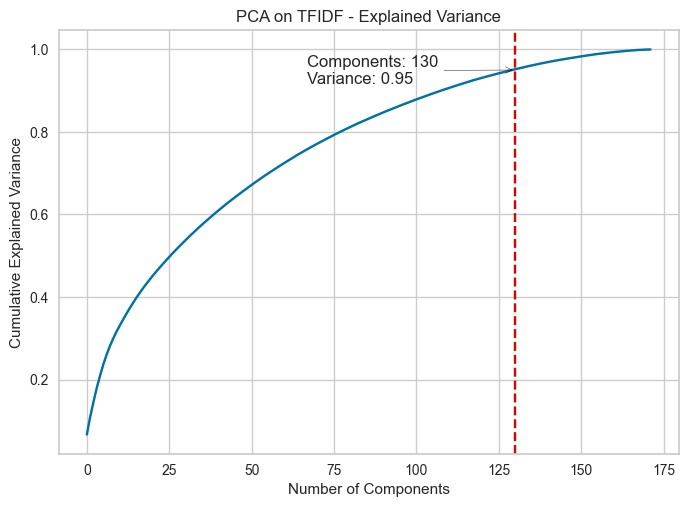

In [6]:
X_pca = pca_reduction(tfidf_matrix, feature_type='TFIDF')

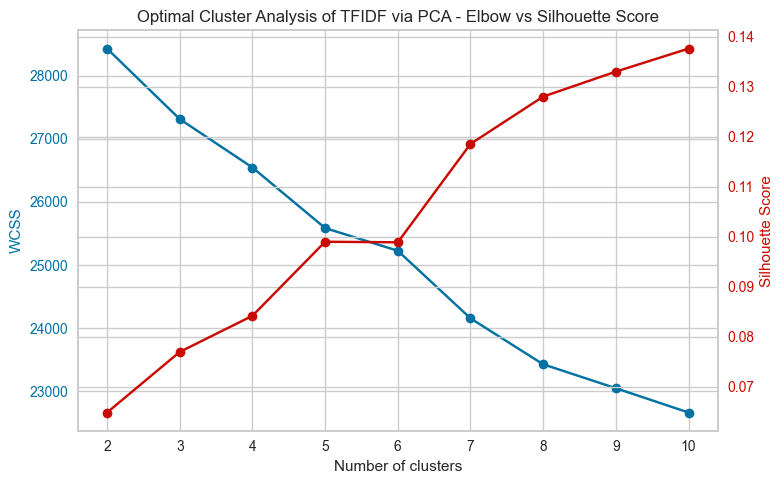

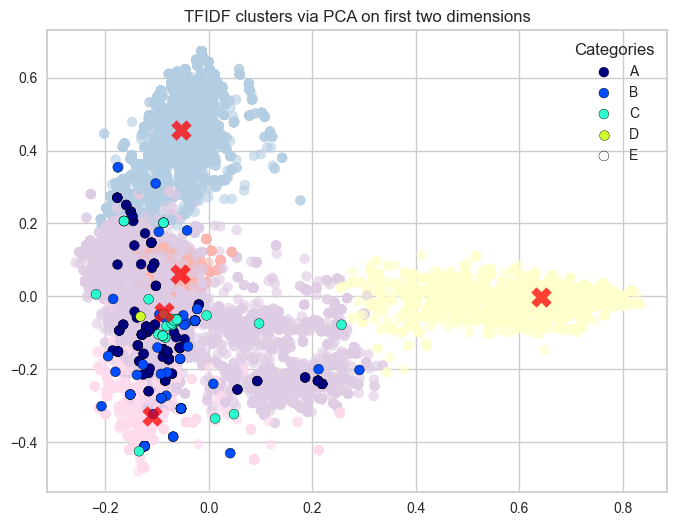

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,TFIDF_PCA_Cluster_Labels,TFIDF_PCA_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,0.179309
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,0.179309
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,0.179309
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,0.179309
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,0.179309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,2,1.013059
35182,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,0.959054
35183,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,2,1.005869
35184,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,2,0.179309


In [7]:
cluster_and_visualize(X_pca, df, reduction_method_name="PCA", feature_type="TFIDF")

### t-SNE

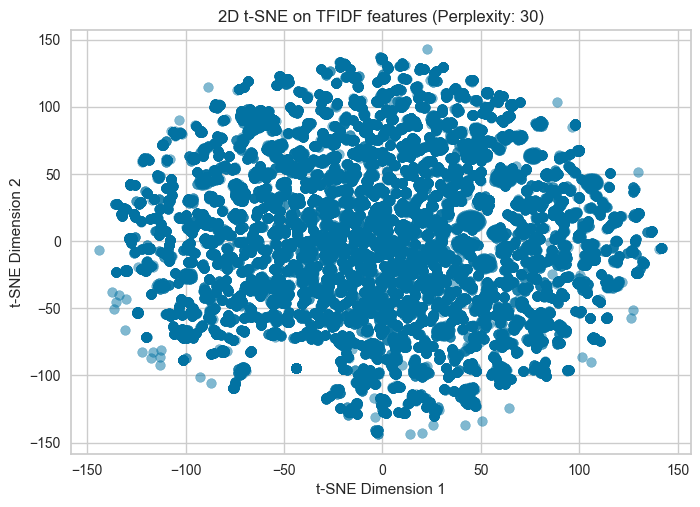

In [8]:
X_tsne = tsne_reduction(tfidf_matrix, perplexity=30, metric='cosine', feature_type='TFIDF')

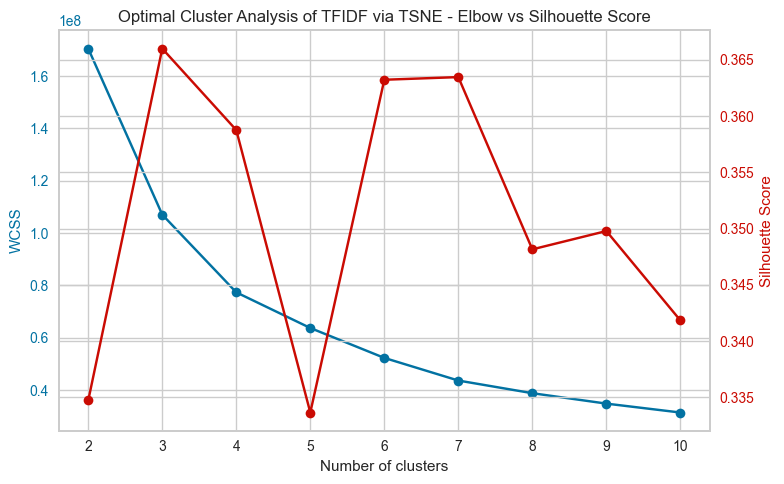

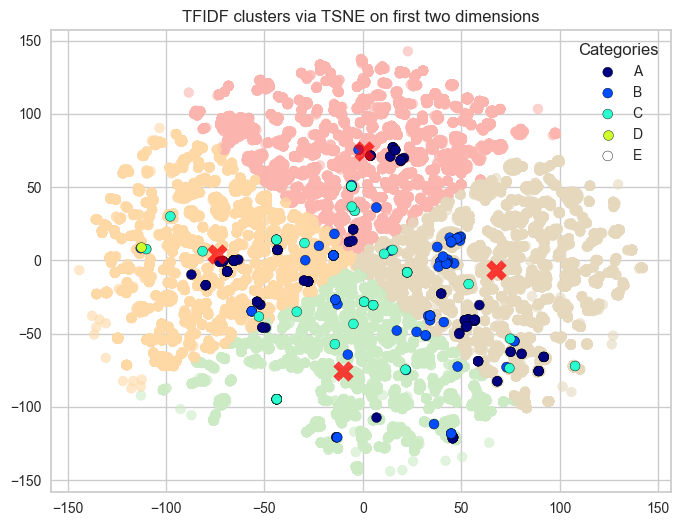

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original,TFIDF_PCA_Cluster_Labels,TFIDF_PCA_Distance_to_Centroid,TFIDF_TSNE_Cluster_Labels,TFIDF_TSNE_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,1,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,1,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,1,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,2,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,2,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,20,23,-1,24.6568,SLIDE BEARING ...,2,1.013059,1,9.572684
35182,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,2,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,0.959054,1,36.761234
35183,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,15,18,-1,11.5649,BOTTOM LINER ...,2,1.005869,3,66.549393
35184,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,4,6,-1,198.9262,STEM ...,2,0.179309,1,38.745506


In [9]:
cluster_and_visualize(X_tsne, df, reduction_method_name="TSNE", feature_type="TFIDF")

### UMAP

/Users/annabzinkowska/anaconda3/envs/thesis/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


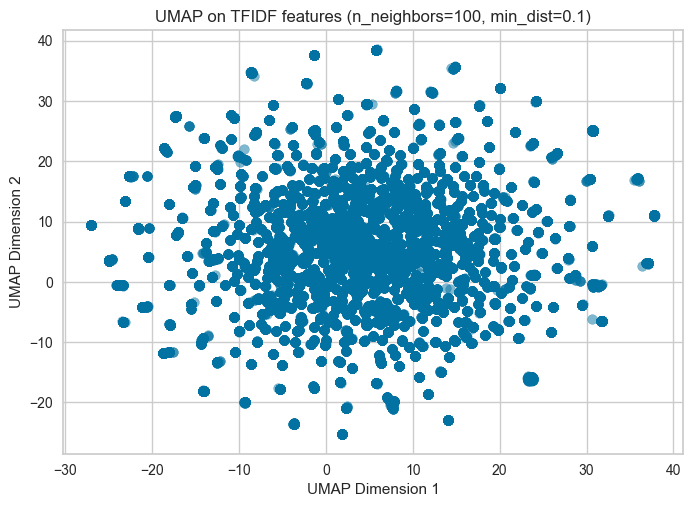

In [10]:
X_umap = umap_reduction(tfidf_matrix, n_neighbors=100, min_dist=0.1, metric='cosine', feature_type='TFIDF')

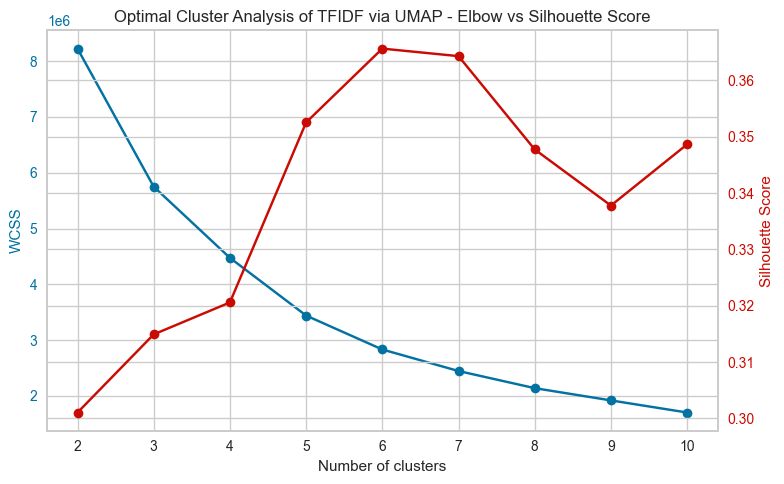

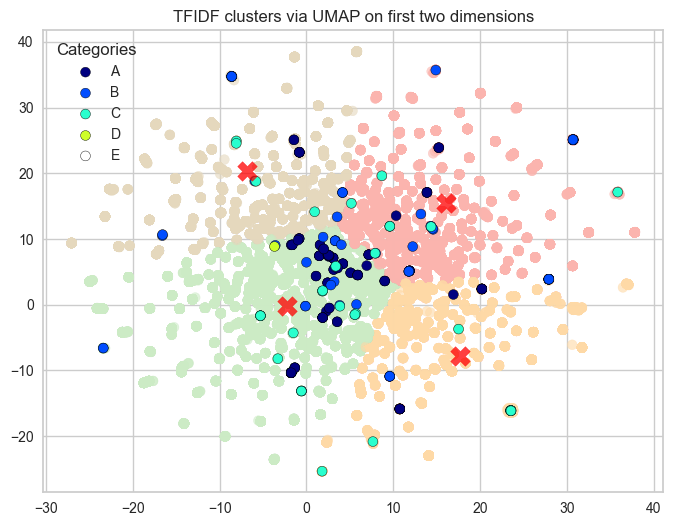

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,...,customer_id_count,category,unit_price_mean,description_original,TFIDF_PCA_Cluster_Labels,TFIDF_PCA_Distance_to_Centroid,TFIDF_TSNE_Cluster_Labels,TFIDF_TSNE_Distance_to_Centroid,TFIDF_UMAP_Cluster_Labels,TFIDF_UMAP_Distance_to_Centroid
0,010004,cfcf sfy bolted hanger nptf stud viton,2,1,2020,2,6,232.92,0.124,DK,...,1,-1,38.8200,"C24FCF-1/2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506,2,10.092113
1,010005,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,200,1774.00,0.259,CO,...,1,-1,8.8700,"C24FCF-1-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506,2,10.154134
2,010006,cfcf sfy bolted hanger nptf stud viton,10,4,2019,2,300,1848.00,0.276,CO,...,1,-1,6.1600,"C24FCF-1 1/2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506,2,10.125621
3,010015,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,300,2115.00,0.318,SE,...,2,-1,7.0500,"C24FCF-2-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506,2,10.120293
4,010040,cfcf sfy bolted hanger nptf stud viton,1,1,2019,2,400,3119.00,0.363,CO,...,2,-1,7.7975,"C24FCF-3-SFY-S BOLTED HANGER, N...",2,0.179309,1,38.745506,2,10.104568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,TE929K,slide bearing,3,1,2016,4,636,15681.71,0.011,US,...,23,-1,24.6568,SLIDE BEARING ...,2,1.013059,1,9.572684,1,11.816497
35182,TE980931,weld adapt tz npt sch pipe,12,4,2017,4,6,524.95,0.270,GB,...,2,-1,87.4917,"WELD.ADAPT. TZ-74 NPT/1½""SCH40 PIP...",2,0.959054,1,36.761234,1,18.770914
35183,TEB6042,bottom liner,10,3,2017,1,158,1827.25,0.038,SE,...,18,-1,11.5649,BOTTOM LINER ...,2,1.005869,3,66.549393,3,9.867003
35184,TEB604Z,stem,6,1,2020,1,13,2586.04,1.150,US,...,6,-1,198.9262,STEM ...,2,0.179309,1,38.745506,2,10.455564


In [11]:
cluster_and_visualize(X_umap, df, reduction_method_name="UMAP", feature_type="TFIDF")

In [1]:
# save df as df_TFIDF_clusters in data folder using to.csv
df.to_csv('/Users/annabzinkowska/DTU/master_thesis/data/df_TFIDF_clusters.csv', index=False)

NameError: name 'df' is not defined